In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../writes/shortpropdata.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(max_iter=1500, random_state=42, verbose=1)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          164     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.47013D+02

At iterate   50    f=  6.15785D-01    |proj g|=  1.46074D+01

At iterate  100    f=  6.08877D-01    |proj g|=  9.89277D-01

At iterate  150    f=  6.08114D-01    |proj g|=  4.89346D+00

At iterate  200    f=  6.07506D-01    |proj g|=  2.28190D+00

At iterate  250    f=  6.06521D-01    |proj g|=  3.24962D+00

At iterate  300    f=  6.05951D-01    |proj g|=  1.52564D+01

At iterate  350    f=  6.03476D-01    |proj g|=  2.60944D+01

At iterate  400    f=  6.02854D-01    |proj g|=  5.23971D+00

At iterate  450    f=  6.01578D-01    |proj g|=  1.80938D+00

At iterate  500    f=  5.98515D-01    |proj g|=  6.06961D+00

At iterate  550    f=  5.91134D-01    |proj g|=  1.55244D+00

At iterate  600    f=  5.89322D-01    |proj g|=  2.77721D+00

At iterate  650    f=  5.8

/Users/johnliu/Documents/vscode-workspace/lol-rivalry/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [8]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.68389662027833
Confusion Matrix:
[[1404  531]
 [ 582 1004]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1935
           1       0.65      0.63      0.64      1586

    accuracy                           0.68      3521
   macro avg       0.68      0.68      0.68      3521
weighted avg       0.68      0.68      0.68      3521



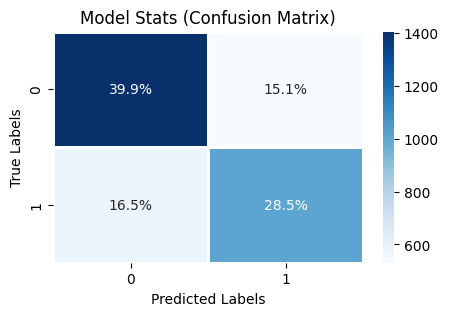

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=1., cmap='Blues', 
                 xticklabels=model.classes_, yticklabels=model.classes_)
total = 0
for t in ax.texts: total += float(t.get_text())
for t in ax.texts: t.set_text(f"{round(100 * float(t.get_text())/total, 1)}%")
plt.title(f'Model Stats (Confusion Matrix)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()